# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Reading CSV

In [2]:
dataset = pd.read_csv('../output2.csv')[['win', 'time', 'score']]

In [3]:
dataset = dataset[dataset.time <= 0.5]

In [4]:
dataset, test_data = dataset.iloc[:-5], dataset.iloc[-5:]

In [5]:
X = dataset[['win', 'time']]
Y = dataset.score

In [6]:
pca = PCA(n_components=2, random_state=42)

In [7]:
fit_x, fit_y = pca.fit_transform(X, Y).T
fit_x = fit_x.reshape(-1, 1)

# Linear Regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(fit_x, fit_y, test_size=0.2, random_state=1234)

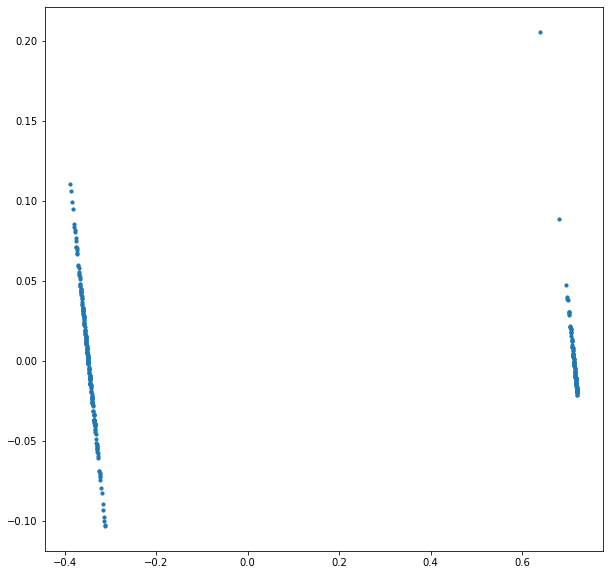

In [9]:
fig = plt.figure(figsize=(10, 10))
m1 = plt.scatter(fit_x, fit_y, s=10)
# m2 = plt.scatter(X_test, y_test, s=10)

In [10]:
model = linear_model.LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
Y_pred = model.predict(X_test)

In [13]:
y_pred_line = model.predict(fit_x)

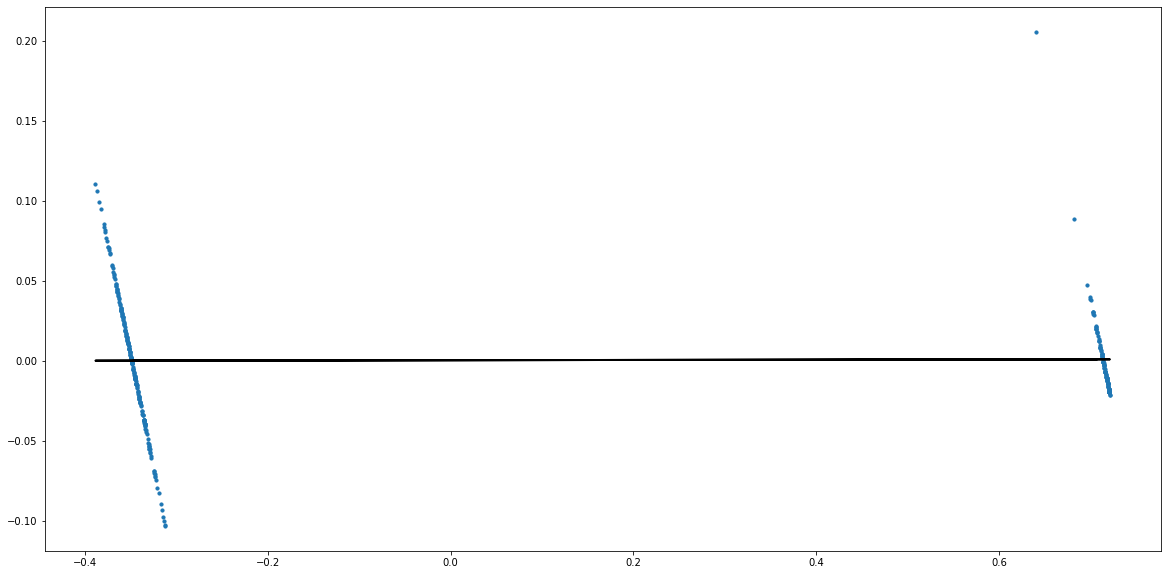

In [14]:
fig = plt.figure(figsize=(20, 10))
m1 = plt.scatter(fit_x, fit_y, s=10)
plt.plot(fit_x, y_pred_line, color="black", linewidth=2, label="Prediction")

In [15]:
win_dataset = dataset[dataset.win == True]
lose_dataset = dataset[dataset.win == False]

In [16]:
win_dataset

,win,time,score
1,True,0.446002,8480
2,True,0.354002,9500
4,True,0.483000,9700
5,True,0.419510,9080
7,True,0.371000,7500
...,...,...,...
334,True,0.367001,13490
336,True,0.417019,11750
337,True,0.402028,10650
338,True,0.356998,8240


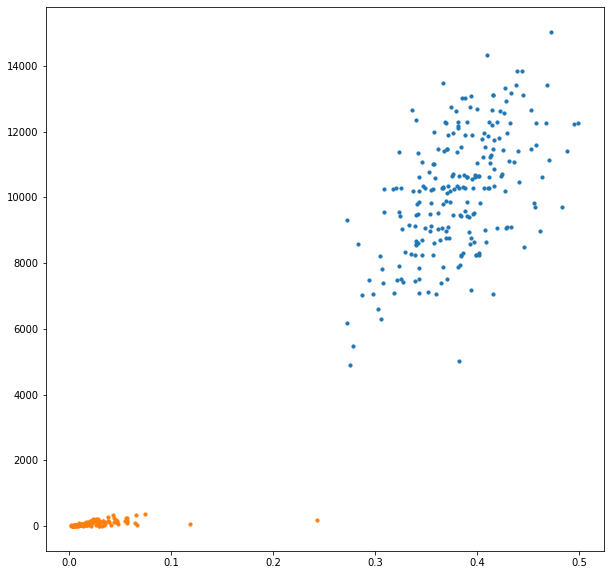

In [17]:
fig = plt.figure(figsize=(10, 10))
m1 = plt.scatter(win_dataset.time, win_dataset.score, s=10)
m1 = plt.scatter(lose_dataset.time, lose_dataset.score, s=10)

In [18]:
def get_regression(ds):
    X = ds.time.array.reshape(-1, 1)
    Y = ds.score
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y_pred_line = model.predict(X)
    fig = plt.figure(figsize=(20, 10))
    m1 = plt.scatter(X, Y, s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    return model

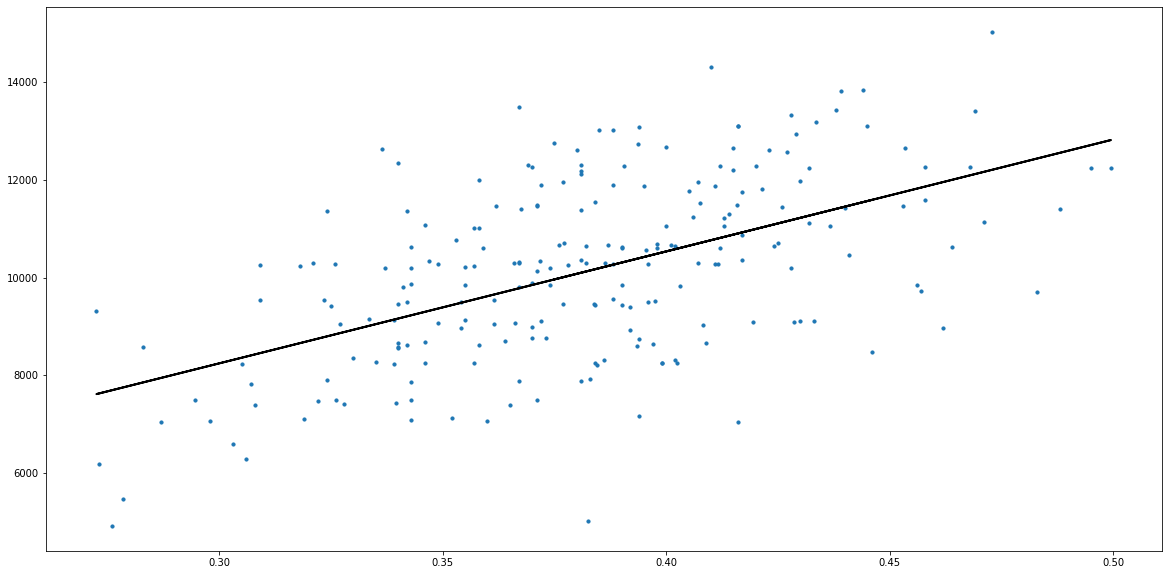

In [19]:
win_model = get_regression(win_dataset)

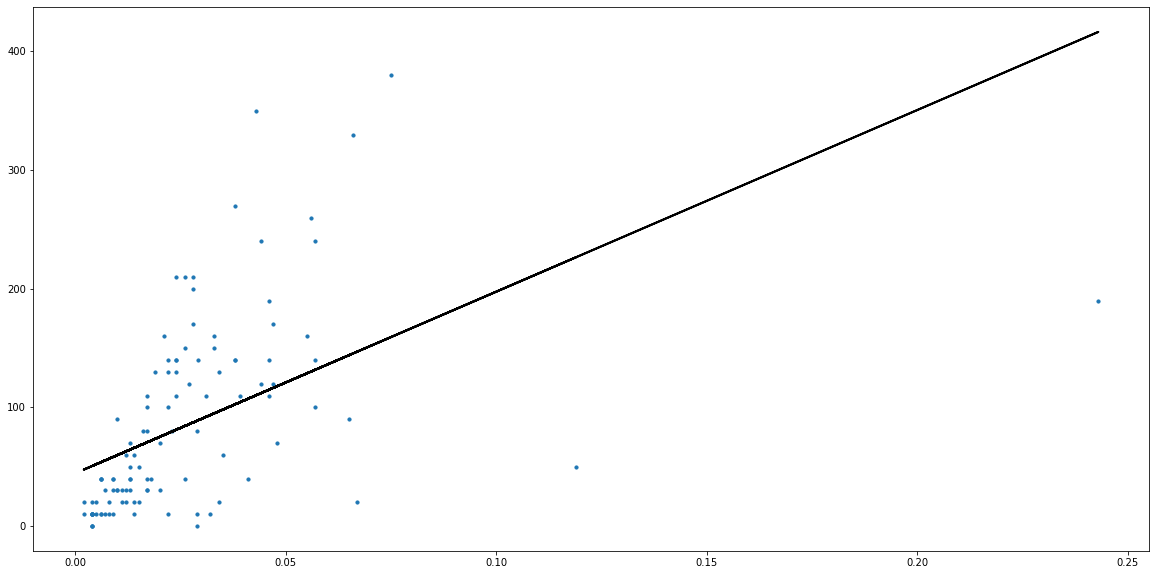

In [20]:
lose_model = get_regression(lose_dataset)

In [21]:
for index, row in test_data.iterrows():
    test_X, test_Y = row[['win', 'time']], row.score
    model = win_model if row.win == True else lose_model
    preticted_Y = model.predict([[test_X.time]])[0]
    print(str(preticted_Y) + ' ' + str(test_Y))    
    

52.19533250470487 10
11462.796884989633 12580
9320.351234435333 7410
12598.028693663991 10360
93.51916911357105 130


In [27]:
check_table = pd.DataFrame(columns=['win', 'time', 'score', 'predicted_score'])

In [28]:
check_table.win = test_data.win
check_table.time = test_data.time
check_table.score = test_data.score
check_table.predicted_score = check_table.apply(lambda row: (win_model if row.win == True else lose_model).predict([[row.time]])[0], axis=1)

In [29]:
check_table

,win,time,score,predicted_score
340,False,0.004999,10,52.195333
342,True,0.440471,12580,11462.796885
343,True,0.347000,7410,9320.351234
344,True,0.490000,10360,12598.028694
345,False,0.031998,130,93.519169
